## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
                                                                                                                                                                                                                                                                                                                                                                            
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#Find duplicate mice by using unique in the DataFrame
duplicate_df = combined_df.groupby(["Mouse ID"])
duplicate_find_df = duplicate_df["Mouse ID"].unique()
duplicate_find_df


Mouse ID
a203    [a203]
a251    [a251]
a262    [a262]
a275    [a275]
a366    [a366]
         ...  
z435    [z435]
z578    [z578]
z581    [z581]
z795    [z795]
z969    [z969]
Name: Mouse ID, Length: 249, dtype: object

In [3]:
#Find mice with duplicate Timepoints
duplicate_timepoint = combined_df.groupby(["Timepoint"])
duplicate_timepoint_find = duplicate_timepoint["Timepoint"].unique()
duplicate_timepoint_find


Timepoint
0      [0]
5      [5]
10    [10]
15    [15]
20    [20]
25    [25]
30    [30]
35    [35]
40    [40]
45    [45]
Name: Timepoint, dtype: object

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_timepoint = combined_df.groupby(["Mouse ID", "Timepoint"])
cleaned_df = combined_df.loc[:, ["Mouse ID", "Sex", "Weight (g)", "Timepoint", "Age_months","Drug Regimen", "Tumor Volume (mm3)", "Metastatic Sites"]]
cleaned_df


,Mouse ID,Sex,Weight (g),Timepoint,Age_months,Drug Regimen,Tumor Volume (mm3),Metastatic Sites
0,k403,Male,16,0,21,Ramicane,45.000000,0
1,k403,Male,16,5,21,Ramicane,38.825898,0
2,k403,Male,16,10,21,Ramicane,35.014271,1
3,k403,Male,16,15,21,Ramicane,34.223992,1
4,k403,Male,16,20,21,Ramicane,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Male,30,25,9,Naftisol,63.145652,2
1889,z969,Male,30,30,9,Naftisol,65.841013,3
1890,z969,Male,30,35,9,Naftisol,69.176246,4
1891,z969,Male,30,40,9,Naftisol,70.314904,4


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "z969", :]
duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicates_dropped_df = cleaned_df.drop_duplicates('Mouse ID', keep='last')
duplicates_dropped_df.head()

,Mouse ID,Sex,Weight (g),Timepoint,Age_months,Drug Regimen,Tumor Volume (mm3),Metastatic Sites
9,k403,Male,16,45,21,Ramicane,22.050126,1
19,s185,Female,17,45,3,Capomulin,23.343598,1
29,x401,Female,15,45,16,Capomulin,28.484033,0
39,m601,Male,17,45,22,Capomulin,28.430964,1
49,g791,Male,16,45,11,Ramicane,29.128472,1


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count = duplicates_dropped_df["Mouse ID"].count()
mouse_count


249

## Summary Statistics

In [8]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Calculate the mean of the tumor volume for each drug regimen
#Make sure you do the calculation per drug

tumor_mean = duplicates_dropped_df["Tumor Volume (mm3)"].mean()
tumor_mean

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



54.99913687738956

In [9]:
#Calculate the median of the tumor volume for each drug regimen
tumor_median = duplicates_dropped_df["Tumor Volume (mm3)"].median()
tumor_median

55.84141007

In [10]:
#Calculate the variance of the tumor volume for each drug regimen
tumor_var = duplicates_dropped_df["Tumor Volume (mm3)"].var()
tumor_var

160.15105396535876

In [11]:
#Calculate the std. deviation of the tumor volume for each drug regimen
tumor_std = duplicates_dropped_df["Tumor Volume (mm3)"].std()
tumor_std  

12.655080164319733

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumor_summary_table = cleaned_df.groupby("Drug Regimen").agg([
                                   "mean",
                                   "median",
                                   "var",
                                   "std",
                                   "sem"])
tumor_stats = tumor_summary_table.loc[:,"Tumor Volume (mm3)"]
tumor_summary_table

Weight (g)                                        Timepoint  \
                   mean median        var       std       sem       mean   
Drug Regimen                                                               
Capomulin     19.965217   20.5   7.466034  2.732404  0.180169  21.565217   
Ceftamin      27.398876   28.0   2.501016  1.581460  0.118535  19.747191   
Infubinol     27.196629   27.0   4.769028  2.183810  0.163684  18.174157   
Ketapril      27.861702   28.0   3.392536  1.841884  0.134333  19.707447   
Naftisol      27.166667   27.0   2.247748  1.499249  0.109930  19.623656   
Placebo       27.928177   28.0   3.378146  1.837973  0.136615  18.674033   
Propriva      27.043478   26.0   2.791848  1.670882  0.131684  16.863354   
Ramicane      19.679825   19.0  10.465318  3.235014  0.214244  21.425439   
Stelasyn      27.856354   28.0   2.701473  1.643616  0.122169  19.226519   
Zoniferol     27.692308   28.0   2.015300  1.419612  0.105229  19.368132   

                                                      ... Tumor Volume (mm3)  \
             median         var        std       sem  ...               mean   
Drug Regimen                                          ...                      
Capomulin        20  206.928043  14.384994  0.948518  ...          40.675741   
Ceftamin         20  204.031772  14.283969  1.070629  ...          52.591172   
Infubinol        15  181.534470  13.473473  1.009879  ...          52.884795   
Ketapril         20  196.839089  14.029935  1.023238  ...          55.235638   
Naftisol         20  201.208951  14.184814  1.040081  ...          54.331565   
Placebo          15  192.954266  13.890798  1.032495  ...          54.033581   
Propriva         15  181.506211  13.472424  1.061776  ...          52.322552   
Ramicane         20  203.796178  14.275720  0.945433  ...          40.216745   
Stelasyn         20  191.620626  13.842710  1.028921  ...          54.233149   
Zoniferol        15  206.918979  14.384679  1.066263  ...          53.236507   

                                                       Metastatic Sites  \
                 median        var       std       sem             mean   
Drug Regimen                                                              
Capomulin     41.557809  24.947764  4.994774  0.329346         0.713043   
Ceftamin      51.776157  39.290177  6.268188  0.469821         1.179775   
Infubinol     51.820584  43.128684  6.567243  0.492236         0.960674   
Ketapril      53.698743  68.553577  8.279709  0.603860         1.297872   
Naftisol      52.509285  66.173479  8.134708  0.596466         1.182796   
Placebo       52.288934  61.168083  7.821003  0.581331         1.441989   
Propriva      50.854632  42.351070  6.507770  0.512884         0.975155   
Ramicane      40.673236  23.486704  4.846308  0.320955         0.548246   
Stelasyn      52.431737  59.450562  7.710419  0.573111         0.872928   
Zoniferol     51.818479  48.533355  6.966589  0.516398         1.230769   

                                                   
             median       var       std       sem  
Drug Regimen                                       
Capomulin         0  0.720790  0.848993  0.055981  
Ceftamin          1  1.402527  1.184283  0.088766  
Infubinol         1  1.054942  1.027104  0.076985  
Ketapril          1  1.942883  1.393873  0.101659  
Naftisol          1  1.479919  1.216519  0.089200  
Placebo           1  1.792449  1.338824  0.099514  
Propriva          1  1.174379  1.083688  0.085407  
Ramicane          0  0.477838  0.691259  0.045780  
Stelasyn          1  0.944874  0.972046  0.072252  
Zoniferol         1  1.559711  1.248884  0.092573  

[10 rows x 25 columns]

## Bar and Pie Charts

AttributeError: 'Text' object has no property 'rotatation'

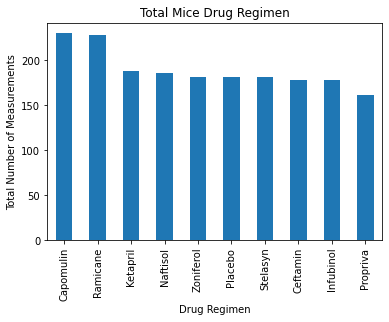

In [17]:
#Generate a bar plot using both Pandas's DataFrame.plot() 
#that shows the number of total mice for each treatment
# regimen throughout the course of the study.
group_df = cleaned_df["Drug Regimen"].value_counts()
group_df.plot(kind="bar")
plt.title ("Total Mice Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.xticks(rotatation=90)
plt.show()

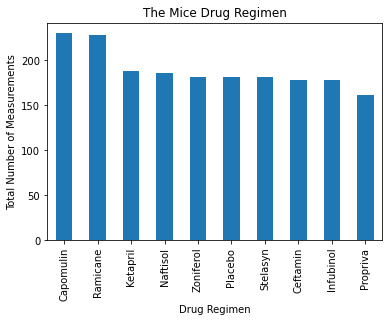

In [24]:
#Generate a bar plot using Matplotlib's pyplot that shows the number
#of total mice for each treatment regimen throughout the course of the study.
mice_data = combined_df["Mouse ID"].value_counts()
measurements_data = combined_df["Drug Regimen"].value_counts()
group_df.plot(kind="bar")
plt.title("The Mice Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.xlabel("Drug Regimen")
plt.show()

In [ ]:
#and Matplotlib's pyplot that shows the number of total mice for each treatment regimen throughout the course of the study.

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
bar_df = pd.DataFrame({"Drug":["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], "val":[0, 50, 100, 150, 200, 250, 300, 350, 400]})
\]\

#tick_locations = x_axis
#plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

In [ ]:

#unique_mice_df = pd.DataFrame(duplicates_dropped_df.groupby(["Drug Regimen"]).count()).reset_index()
#mouse_regimen = duplicates_dropped_df[["Drug Regimen","Mouse ID"]]
#mouse_regimen = mouse_regimen.rename(columns={"Mouse ID": "Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
#mouse_regimen = mouse_regimen.set_index("Drug Regimen")

In [ ]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# Create an array that contains the number of users each language has
#mouse_regimen = mouse_regimen.plot(kind="bar", figsize=(10,3))

#plt.title("Count per Drug Regimen")
#plt.show("bar")

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="center" to ensure our bars line up with our tick marks
#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
